<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

# Participantes

Davi Passanha de Sousa Guerra - RM:551605

Rui Amorim Siqueira - RM:98436

Cauã Gonçalves de Jesus - RM:97648

## Checkpoint 1 - Análise de dados de avaliações de filmes de Terror do Rotten e IMDb.

Fonte de dados:

1. Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows
2. IMBD: https://www.imdb.com/
3. Rottentomatoes: https://www.rottentomatoes.com - https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data

Podem incorporar fonte de dados adicional.<br>
No Kaggle há bases de dados do IMDB e Rottentomatoes que podem ser utilizadas.<br>
Com o mesmo conjunto de dados é possível obter análise de dados diferentes.

- Equipes de 3 alunos (ou 2 alunos, não pode ser indivual e nem > 3 alunos)
- Publicar o notebook do projeto no GitHub e enviar o link no MS Teams (Lembre-se que recrutadores pedem o link do seu GitHub, este projeto é parte do seu portfolio)
- Apenas um aluno deve postar o link para o projeto no MS Teams
- Lembrem-se de por título no projeto e o nome dos membros da equipe
- Encontrar uma chave para combinar os dados do Netflix, iMDB e Rottentomatoes
  - Note o código na URL:
     - https://www.rottentomatoes.com/m/0814255
     - https://www.imdb.com/title/tt0814255/ 

- O escopo principal de pesquisa de cada equipe deve ser diferente, exemplo:
   - Filmes de terror, drama ou comédia
   - Filmes vencedores do Oscar
   - Filmes da Marvel ou DC
   - Filmes de maior bilheteria de todos os tempos
   - Séries da Disney
   - Star Wars
   - Filmes de 2023
   - Atores em comum
   - Filmes do Nicolas Cage, Alfred Hitchcock, Meryl Streep, Steven Spielberg, Stephen King etc...
   - Filmes que superaram o investimento quanto a faturamento (boxoffice)
- Estabelecer e responder 10 questões de pesquisa avançadas (interessante e complexa)
- As respostas devem ter explicação (análise) em texto MARKDOWN, código e gráficos:
  - Como em GUI card design: título, subtítulo, texto (MD), código, gráfico ou tabela ou valores, etc...
- Usar Matplotlib e/ou Seaborn para gráficos
- Utilizar regressão linear
- Utilizar teste de hipótese
- Elaborar conclusão final
- Publicar o notebook do projeto .ipynb no GitHub
- Testar/mostrar para uma ou duas pessoas o seu projeto (Hallway Testing) para obter observações de alguém fora do contexto e fazer ajustes

Lembrem-se do processo de ciências dos dados:

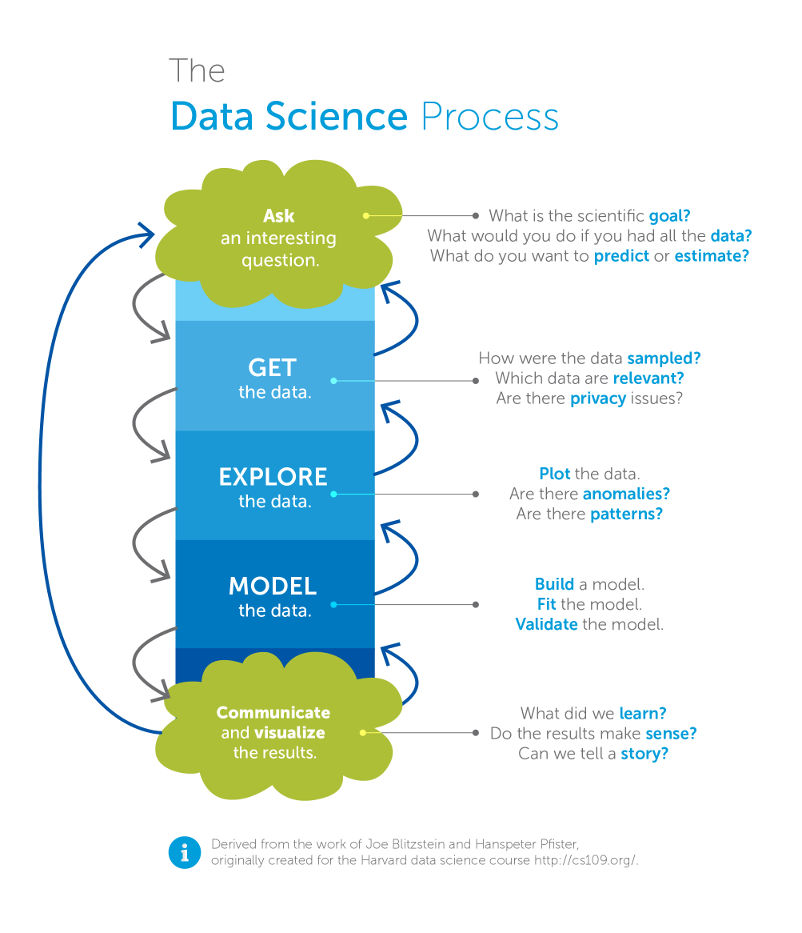

https://devopedia.org/data-science

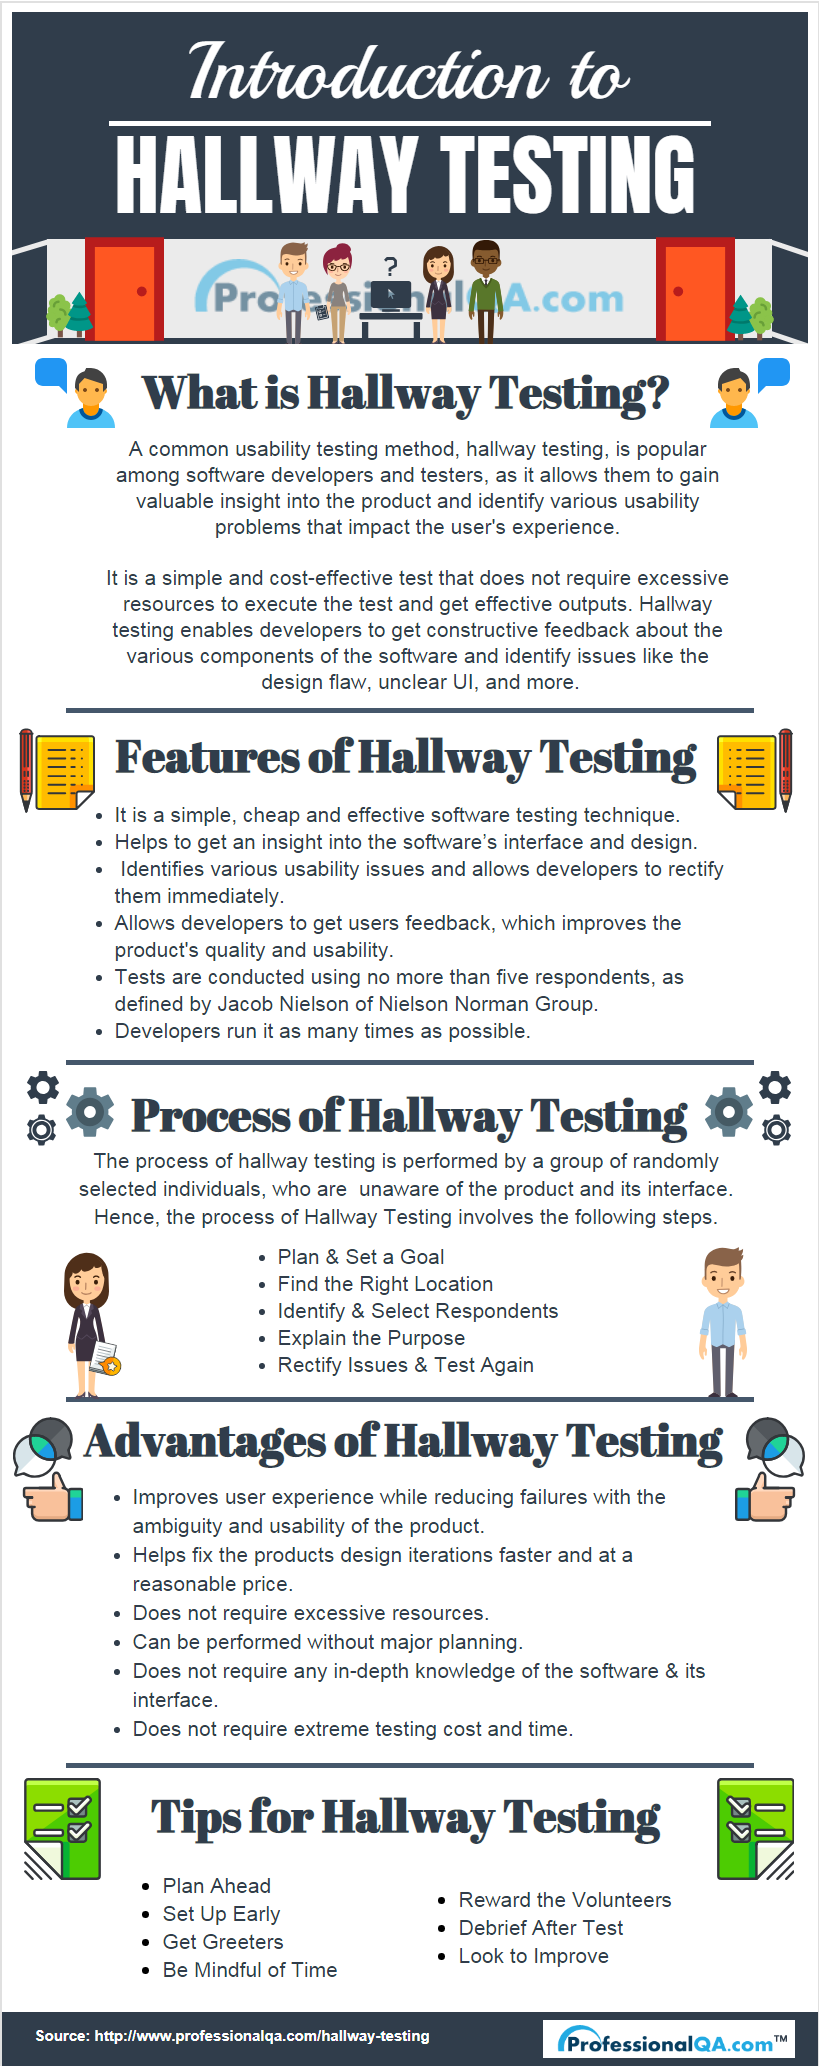

https://www.professionalqa.com/hallway-testing

Referências:

- https://allendowney.github.io/ElementsOfDataScience/
- https://jakevdp.github.io/PythonDataScienceHandbook/
- https://seaborn.pydata.org/
- https://matplotlib.org/
- https://pandas.pydata.org/
- https://wesmckinney.com/book/


# Resolução

## Importações de bibliotecas

In [157]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Criação Dataframes

### IMDb

In [158]:
imdb = pd.read_csv('imdb_top_1000.csv')
del imdb['Poster_Link']
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [159]:
def filtro(linha):
    return any(genre in linha['Genre'] for genre in ["Horror", "Thriller"])
imdb_terror = imdb[imdb.apply(filtro,axis=1)]
imdb_terror.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,Gisaengchung,2019,A,132 min,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,"53,367,844"
28,The Silence of the Lambs,1991,A,118 min,"Crime, Drama, Thriller",8.6,A young F.B.I. cadet must receive the help of ...,85.0,Jonathan Demme,Jodie Foster,Anthony Hopkins,Lawrence A. Bonney,Kasi Lemmons,1270197,"130,742,922"
33,Joker,2019,A,122 min,"Crime, Drama, Thriller",8.5,"In Gotham City, mentally troubled comedian Art...",59.0,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,"335,451,311"
37,The Departed,2006,A,151 min,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,85.0,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,1189773,"132,384,315"
41,The Usual Suspects,1995,A,106 min,"Crime, Mystery, Thriller",8.5,A sole survivor tells of the twisty events lea...,77.0,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin,991208,"23,341,568"


### Netflix

In [160]:
netflix = pd.read_csv('netflix_titles.csv')
del netflix['show_id']
netflix.head() 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [161]:
def filtro(linha):
    return any(genre in linha['listed_in'] for genre in ["Horror", "Thriller"])
netflix_terror = netflix[netflix.apply(filtro,axis=1)]
netflix_terror.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
18,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
28,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
33,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...


### Rotten

In [162]:
rotten = pd.read_csv('rotten_tomatoes_movies.csv')
del rotten['rotten_tomatoes_link']
rotten.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [163]:
def filtro(linha):
    if type(linha['genres']) == float:
        return False
    return any(genre in linha['genres'] for genre in ["Horror", "Thriller"])
rotten_terror = rotten[rotten.apply(filtro,axis=1)]
rotten_terror.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
10,Dark Water,"In this moody Japanese horror film, newly-sing...",NaN,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,2017-03-23,...,Toho Company Ltd,Fresh,80.0,15.0,Upright,66.0,21475.0,3,12,3
22,Dead End,When a family en route to a Christmas Eve gath...,NaN,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",2003-09-26,2018-12-11,...,LionsGate Entertainment,Fresh,75.0,8.0,Upright,60.0,10373.0,1,6,2
30,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,2012-04-16,...,Sony Pictures,Rotten,8.0,83.0,Spilled,30.0,279994.0,21,7,76
33,Malevolence,"Bank robbers (Brandon Johnson, Heather Magee) ...",NaN,R,Horror,Stevan Mena,Stevan Mena,"Samantha Dark, R. Brandon Johnson, Heather Mag...",2004-09-10,2017-03-30,...,Anchor Bay Entertainment,Rotten,33.0,18.0,Upright,83.0,2622.0,4,6,12
34,Eternal,A detective's (Conrad Pla) search for his miss...,"Even by the standards of camp, Eternal fails t...",R,"Horror, Mystery & Suspense","Wilhelm Liebenberg, Federico Sanchez","Wilhelm Liebenberg, Federico Sanchez","Sarah Manninen, Caroline Neron, Victoria Sanch...",2004-08-26,2016-09-23,...,Regent Releasing,Rotten,21.0,34.0,Spilled,39.0,1295.0,10,7,27


## Questões elaboradas

### Questão 1. *Qual é a média de avaliações dos filmes de terror no Rotten Tomatoes e no IMDb?*


In [164]:
#Média de avaliações dos filmes de terror Rotten Tomatoes
avaliacoes_rotten = rotten_terror['tomatometer_rating'].mean()#Colhendo dados da coluna de avaliações
 
print(f' A média das avaliações do Rotten Tomatoes é: {avaliacoes_rotten}') #Mostrando o resultado
 
#Média de avaliações dos filmes de terror IMDb
avaliacoes_imbd = imdb_terror['IMDB_Rating'].mean()#Colhendo dados da coluna de avaliações
 
print(f' A média das avaliações do IMDb é: {avaliacoes_imbd}') #Mostrando o resultado

 A média das avaliações do Rotten Tomatoes é: 51.57507360157017
 A média das avaliações do IMDb é: 7.911320754716981


### Questão 2. *Quais são os filmes e séries de terror com a maior e menor duração disponíveis na Netflix?*


In [165]:
#Coletando a maior duração
maior_duracao = netflix_terror['duration'].max()
#Mostrando quais são as maiores durações
print(f'A maior duração de um filme de terror na Netflix é: {maior_duracao}')
 
#Coletando a menor duração
menor_duracao = netflix_terror['duration'].min()
#Mostrando quais são as menores durações
print(f'A maior duração de um filme de terror na Netflix é: {menor_duracao}')

A maior duração de um filme de terror na Netflix é: 99 min
A maior duração de um filme de terror na Netflix é: 1 Season


### Questão 3. *Qual é a diferença média entre as avaliações de filmes de terror no Rotten Tomatoes e no IMDb?*

In [166]:
print(f'Avaliação média de {imdb_terror.IMDB_Rating.count()} filmes de terror do IMDb foi de: {imdb_terror.IMDB_Rating.mean()},') 
print(f'enquanto a avaliação média de {rotten_terror.tomatometer_rating.count()} filmes de terror do Rotten foi de: {rotten_terror.tomatometer_rating.mean()}.')
print(f'Então, vemos que o IMDb possui uma dirença média porcentual de {round((imdb_terror.IMDB_Rating.mean()*1000/rotten_terror.tomatometer_rating.mean())-100,2)} %.')
print(f'Ou seja, as notas para filme de terror do IMDb são {round((imdb_terror.IMDB_Rating.mean()*1000/rotten_terror.tomatometer_rating.mean())-100,2)}% maiores que do Rotten.')

Avaliação média de 159 filmes de terror do IMDb foi de: 7.911320754716981,
enquanto a avaliação média de 2038 filmes de terror do Rotten foi de: 51.57507360157017.
Então, vemos que o IMDb possui uma dirença média porcentual de 53.39 %.
Ou seja, as notas para filme de terror do IMDb são 53.39% maiores que do Rotten.


### Questão 4. *Quantos filmes de terror têm uma classificação superior a 75% no Rotten Tomatoes e estão disponíveis na Netflix?*

In [167]:
#Criando um critério para coletar os filmes com notas maiores que 75
nota_terror = rotten_terror [rotten_terror['tomatometer_rating']> 75]
#Verificando os filmes com notas maiores a 75 que estão na Netflix
disponibilidade_netflix =  nota_terror[nota_terror['movie_title'].isin(netflix_terror['title'])]
filmes_aceitos = disponibilidade_netflix.shape[0]
#Resultado dos filmes disponíveis
print(f'O número de filmes disponíveis na Netlix com a nota superiror a 75 no Rotten Tomatoes é:{filmes_aceitos}')

O número de filmes disponíveis na Netlix com a nota superiror a 75 no Rotten Tomatoes é:42


### Questão 5. *Qual é a média de avaliações dos filmes de terror de diferentes décadas no Rotten Tomatoes e no IMDb?*

In [168]:
imdb_terror_ = imdb_terror.copy()
imdb_terror_['Released_Year'] = imdb_terror_['Released_Year'].apply(lambda x:int(x)) #Transforma uma string para int
decada10 = imdb_terror_[(imdb_terror_['Released_Year'] > 2009) & (imdb_terror_['Released_Year'] < 2020)] #Analiza e pega os filmes feitos na década de 2010
decada00 = imdb_terror_[(imdb_terror_['Released_Year'] > 1999) & (imdb_terror_['Released_Year'] < 2010)] #Analiza e pega os filmes feitos na década de 2000
decada90 = imdb_terror_[(imdb_terror_['Released_Year'] > 1989) & (imdb_terror_['Released_Year'] < 2000)] #Analiza e pega os filmes feitos na década de 1990

#Analiza as médias de cada década
media_decada10 = decada10['IMDB_Rating'].mean() 
media_decada00 = decada00['IMDB_Rating'].mean()
media_decada90 = decada90['IMDB_Rating'].mean()

#Mostra as médias de cada década
print(f'A media de filmes de terror da decada de 2010 é: {media_decada10}')
print(f'A media de filmes de terror da decada de 2000 é: {media_decada00}')
print(f'A media de filmes de terror da decada de 1990 é: {media_decada90}')

A media de filmes de terror da decada de 2010 é: 7.94375
A media de filmes de terror da decada de 2000 é: 7.844444444444447
A media de filmes de terror da decada de 1990 é: 7.900000000000001


### Questão 6. *Quais filmes de terror têm a maior discrepância entre suas avaliações no Rotten Tomatoes e no IMDb?*

In [169]:
comuns = set(rotten_terror.movie_title) & set(imdb_terror.Series_Title) #Filmes comuns entre o rotten e o IMDb
#Ultiza esta lista para filtrar o dataframe do rotten
filmes_terror_comun_imdb_rotten = rotten_terror[rotten_terror['movie_title'].isin(comuns)][['movie_title','tomatometer_rating']]
#Adiciona a coluna com as notas do IMDb
filmes_terror_comun_imdb_rotten['IMDB_Rating'] = [imdb_terror[imdb_terror['Series_Title'].isin(comuns)].loc[imdb_terror[imdb_terror['Series_Title'].isin(comuns)]['Series_Title'] == x, 'IMDB_Rating'].iloc[0] for x in list(filmes_terror_comun_imdb_rotten.movie_title)]
#Divide as notas do rotten para fazer a diferença proporcional
filmes_terror_comun_imdb_rotten['tomatometer_rating'] = filmes_terror_comun_imdb_rotten.tomatometer_rating/10
#Adiciona a coluna com as diferenças
filmes_terror_comun_imdb_rotten['Diferença_abs_notas'] = abs(filmes_terror_comun_imdb_rotten.tomatometer_rating - filmes_terror_comun_imdb_rotten.IMDB_Rating)
#Apresenta
filmes_terror_comun_imdb_rotten

,movie_title,tomatometer_rating,IMDB_Rating,Diferença_abs_notas
317,The Birds,9.5,7.7,1.8
480,Halloween,9.6,7.7,1.9
525,Invasion of the Body Snatchers,9.3,7.7,1.6
526,The Invisible Man,9.4,7.7,1.7
550,King Kong,9.8,7.9,1.9
551,King Kong,5.3,7.9,2.6
629,Night of the Living Dead,9.7,7.9,1.8
778,The Thing,8.5,8.1,0.4
957,Frankenstein,1.7,7.8,6.1
1218,Psycho,3.8,8.5,4.7


**Vemos que os filmes com maior discrepância nas avaliações são The Thing e Psycho.**

### Questão 7. *Quais são os filmes de terror lançados no período de 2015 a 2020 com a melhor e a pior avaliação média no Rotten Tomatoes?*

In [170]:
rotten_terror_ = rotten_terror.copy()
rotten_terror_['original_release_date'] = rotten_terror_['original_release_date'].apply(lambda x:int(x[:4]) if type(x)!=float else None)#Pega as datas, transforma em int, pegando os primeiros caracteres e faz um "IF" caso o dado seja float, ele será ignorado
periodo_lancado = rotten_terror_[(rotten_terror_['original_release_date'] > 2014) & (rotten_terror_['original_release_date'] < 2021)] #filtra para dados de 2015 a 2020

melhor_avaliacao = periodo_lancado['tomatometer_rating'].max() #Pega os valores máximos
pior_avaliacao = periodo_lancado['tomatometer_rating'].min() #Pega os valores minimos

buscar_melhor_filme = rotten_terror_[(rotten_terror_['tomatometer_rating'] > 99)] #Busca os filmes com valores máximos
buscar_pior_filme = rotten_terror_[(rotten_terror_['tomatometer_rating'] == 0)] #Busca os filmes com valores minimos

melhores_filmes = buscar_melhor_filme['movie_title'] #Guarda os filmes com valores máximos
piores_filmes = buscar_pior_filme['movie_title'] #Guarda os filmes com valores minimos

print(f'Os melhores filmes avaliados foram: {melhores_filmes}') #Mostra os filmes com valores máximos

Os melhores filmes avaliados foram: 88                                              Borderland
329                                              Bluebeard
773                                                  Them!
779                                                 Thirst
995                                  Alice (Neco z Alenky)
1776                            The Friends of Eddie Coyle
2499                                         Alien Raiders
2932                                                 Artik
3100                                  Bad Blood: The Movie
3767     La Novia Ensangrentada (The Blood Spattered Br...
4475                                        Chastity Bites
4966                                               Creep 2
5027                                       Crush The Skull
5057                                    Curse of the Demon
5253                                            Dead Dicks
5344                                            Dead Sushi
5404                

### Questão 8. *Quantos filmes de terror receberam uma classificação de “Fresh” no Rotten Tomatoes e têm uma avaliação de pelo menos 70/100 no IMDb?*

In [171]:
#Pega os nomes e a avaliação e analiza quais se tem os nomes em comum
common = set(rotten_terror.movie_title) & set(imdb_terror.Series_Title)
filmes_terror_comun_imdb_rotten2 = rotten_terror[rotten_terror['movie_title'].isin(common)][['movie_title','tomatometer_status']]
filmes_terror_comun_imdb_rotten2['IMDB_Rating'] = [imdb_terror[imdb_terror['Series_Title'].isin(common)].loc[imdb_terror[imdb_terror['Series_Title'].isin(common)]['Series_Title'] == x, 'IMDB_Rating'].iloc[0] for x in list(filmes_terror_comun_imdb_rotten.movie_title)]
dados_filmes_terror_common = filmes_terror_comun_imdb_rotten2[(filmes_terror_comun_imdb_rotten2['tomatometer_status'] == 'Fresh') & (filmes_terror_comun_imdb_rotten2['IMDB_Rating'] > 6.9)]

print(f'Os Filmes foram esses: {dados_filmes_terror_common}') #Printa esses dados

Os Filmes foram esses:                     movie_title tomatometer_status  IMDB_Rating
6693               Frankenstein              Fresh          7.8
9737               Lost Highway              Fresh          7.6
11059  Night of the Living Dead              Fresh          7.9


### Questão 9. *Qual o filme presente na netflix que possui a maior nota combinada do IMDd e Rotten?*

In [172]:
#Filtra filmes presentes nos três dataframes
notas_combinadas = imdb_terror[imdb_terror['Series_Title'].isin(set(netflix_terror.title) & set(rotten_terror.movie_title) & set(imdb_terror.Series_Title))][['Series_Title','IMDB_Rating']]
#Adiciona as notas do rotten
notas_combinadas['tomatometer_rating'] = [rotten_terror[rotten_terror['movie_title'] == each]['tomatometer_rating'].iloc[-1] for each in notas_combinadas.Series_Title]
#Adiciona as médias
notas_combinadas['Media_pontos'] = (notas_combinadas.IMDB_Rating + notas_combinadas.tomatometer_rating)/2
#Apresenta
notas_combinadas

,Series_Title,IMDB_Rating,tomatometer_rating,Media_pontos
49,Psycho,8.5,96.0,52.25
425,Rosemary's Baby,8.0,96.0,52.00
567,Freaks,7.9,88.0,47.95


**Podemos observar que o filme que apresenta a maior nota combinada é o Psycho**

### Questão 10. *Qual é a distribuição das avaliações de filmes de terror em Rotten Tomatoes (por exemplo, porcentagens de avaliações “Fresh” e “Rotten”)?*

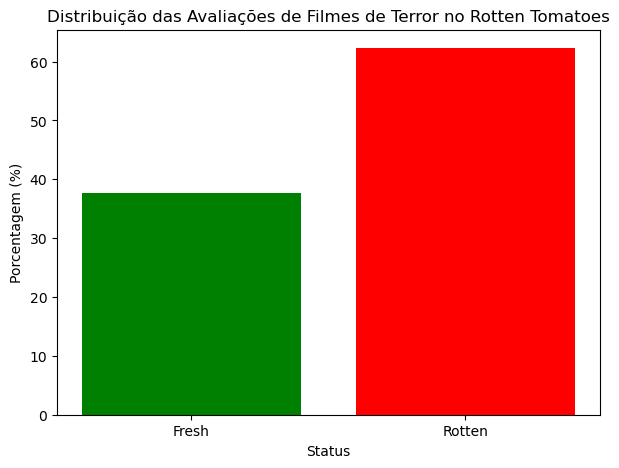

In [173]:
avaliacao_tomatometer_fresh = rotten_terror[(rotten_terror['tomatometer_status'] == 'Fresh')] #Pega os filmes com o status 'Fresh'
avaliacao_tomatometer_rotten = rotten_terror[(rotten_terror['tomatometer_status'] == 'Rotten')] #Pega os filmes com o status 'Rotten'

# Calcula a quantidade de filmes com status "Fresh" e "Rotten"
count_fresh = len(avaliacao_tomatometer_fresh)
count_rotten = len(avaliacao_tomatometer_rotten)

# Calcula o total de filmes
total_filmes = count_fresh + count_rotten

# Calcula as porcentagens
percent_fresh = (count_fresh / total_filmes) * 100
percent_rotten = (count_rotten / total_filmes) * 100

# Cria um dicionário com os dados
status_percentages = {'Fresh': percent_fresh, 'Rotten': percent_rotten}

# Faz a visualização do gráfico em barras
plt.figure(figsize=(7, 5))  # Defini o tamanho do gráfico
plt.bar(status_percentages.keys(), status_percentages.values(), color=['green', 'red'])   # Cria gráfico de barras
plt.title('Distribuição das Avaliações de Filmes de Terror no Rotten Tomatoes')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Status')
plt.xticks(rotation=0) # Mantem os rótulos na horizontal
plt.show()

## Hipótese

Pensando no conceito de hipótese o qual é usado para realizar a verificação de 
uma suposição sobre um parâmetro populacional, verificando se é verdadeiro ou falso. 
Iremos avaliar a correlação das notas para cada filme de terror enviada pelo usuário rotten e comparar
com as notas do site do rotten tomatoes para assim implementar um modelo de regeressão linear
que é utilizado para encontrar uma linha reta que melhor ajusta cada dado, permitindo prever os 
valores da variável. Facilitando a identificação de tendências e fazer previsões.

### Teste

In [174]:
print(f"\nVemos que a correlação é de: {round(rotten_terror[['tomatometer_rating','audience_rating']].corr().iloc[0].iloc[1],2)}")


Vemos que a correlação é de: 0.63


In [175]:
rotten_terror.dropna(inplace=True)
X = rotten_terror.tomatometer_rating.values.reshape(-1,1)
Y = rotten_terror.audience_rating
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

print(f'\no modelo teve uma acurácia de: {round(model.score(x_test,y_test),2)*100} %')


o modelo teve uma acurácia de: 53.0 %


### Conclusão

Ao realizar a análise da hipótese foi visto que os campos de notas do rotten tomatoes e notas do usuário
possuem uma correlação alta, no valor de 0.63, podemos observar isso no modelo de regeressão linear onde 
o foi obtido uma acurácia de 53%.